In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data=np.load('jazz.npy')

In [3]:
lengths=[]
for piece in data:
    length=piece['inputs'].shape[0]
    lengths.append(length)

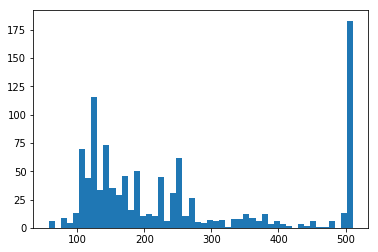

In [4]:
plt.hist(lengths,50)
plt.show()

In [5]:
print('min: ' + str(np.min(np.array(lengths))))
print('max: ' + str(np.max(np.array(lengths))))

min: 57
max: 511


In [13]:
len(data)

1070

In [45]:
data=np.load('bach_g64.npy')

In [29]:
i=0
for p in data:
    i+=1
    if np.where(p==1)[0].shape[0]!=0:
        print(i)
        print(np.where(p==1)[0])

4
[224]
65
[136]
67
[136]
107
[ 28  92 220]
108
[ 28  92 220]
109
[ 28  92 220]
110
[ 28  92 220]
135
[ 80 176 336 432]
136
[ 80 176 336 432]
137
[ 80 176 336 432]
138
[ 80 176 336 432]
159
[24 56]
160
[24 56]
161
[24 56]
162
[24 56]
195
[128]
196
[128]
197
[128]
198
[128]
211
[184]
212
[184]
213
[184]
214
[184]
243
[188]
244
[188]
245
[188]
246
[188]
247
[188]
252
[ 84 228 324]
253
[ 84 228 324]
254
[ 84 228 324]
255
[ 84 228 324]
256
[ 84 228 324]
257
[ 84 228 324]
258
[ 84 228 324]
291
[184]
295
[24 56]
296
[24 56]
297
[24 56]
298
[24 56]
307
[36]
308
[36 84 96]
326
[ 32 112]
327
[ 32 112]
328
[ 32 112]
329
[ 32 112]
334
[ 24  88 152 184 216]
335
[ 24  88 152 184 216]
336
[ 24  88 152 184 216]
337
[ 24  88 152 184 216]
346
[ 40 120 168 280]
347
[ 40 120 168 280]
348
[ 40 120 168 280]
349
[ 40 120 168 280]
351
[208]
363
[ 36  60  96 132 156 232]
364
[ 36  60  96 132 156 260]
365
[ 10  28  96 106 124 224 264 274]
514
[ 28  36  84  92 140 148 196 204 220]
519
[  4  36 228 292 324]
536


In [30]:
data[107]

array([19,  0, 18,  0, 19,  0,  0,  0, 19,  0,  0,  0, 19,  0, 18, 16, 18,
        0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, 23,  0,
        0,  0, 25,  0,  0,  0, 27,  0,  0,  0, 28,  0,  0,  0, 25,  0,  0,
        0, 23,  0,  0,  0,  0,  0, 21,  0, 19,  0,  0,  0, 19,  0, 18,  0,
       19,  0,  0,  0, 19,  0,  0,  0, 19,  0, 18, 16, 18,  0,  0,  0, 19,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, 23,  0,  0,  0, 25,  0,
        0,  0, 27,  0,  0,  0, 28,  0,  0,  0, 25,  0,  0,  0, 23,  0,  0,
        0,  0,  0, 21,  0, 19,  0,  0,  0, 21,  0,  0,  0, 21,  0,  0,  0,
       23,  0,  0,  0, 23,  0, 19,  0, 21,  0,  0,  0, 21,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0, 21,  0, 23,  0, 25,  0,
        0,  0, 26,  0,  0,  0, 21,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 21,  0,  0,  0, 23,  0,  0,  0, 24,  0, 23,  0,
       21,  0,  0,  0, 21,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0, 19,  0

In [33]:
def event2note(seq):
    length=len(seq)
    for i in range(length):
        note=seq[i]
        if note==1:
            seq[i]=0
        for j in range(i+1,length):
            if seq[j]==0:
                if note==1:
                    pass
                else:
                    seq[j]=note
            else:
                break
    return seq

In [42]:
def event2note(seq):
    length=len(seq)
    for i in range(length):
        note=seq[i]
        for j in range(i+1,length):
            if seq[j]==0:
                seq[j]=note
            else:
                break
    return seq

In [46]:
data[107]

array([19,  0, 18,  0, 19,  0,  0,  0, 19,  0,  0,  0, 19,  0, 18, 16, 18,
        0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, 23,  0,
        0,  0, 25,  0,  0,  0, 27,  0,  0,  0, 28,  0,  0,  0, 25,  0,  0,
        0, 23,  0,  0,  0,  0,  0, 21,  0, 19,  0,  0,  0, 19,  0, 18,  0,
       19,  0,  0,  0, 19,  0,  0,  0, 19,  0, 18, 16, 18,  0,  0,  0, 19,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, 23,  0,  0,  0, 25,  0,
        0,  0, 27,  0,  0,  0, 28,  0,  0,  0, 25,  0,  0,  0, 23,  0,  0,
        0,  0,  0, 21,  0, 19,  0,  0,  0, 21,  0,  0,  0, 21,  0,  0,  0,
       23,  0,  0,  0, 23,  0, 19,  0, 21,  0,  0,  0, 21,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0, 21,  0, 23,  0, 25,  0,
        0,  0, 26,  0,  0,  0, 21,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 21,  0,  0,  0, 23,  0,  0,  0, 24,  0, 23,  0,
       21,  0,  0,  0, 21,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0, 19,  0

In [47]:
event2note(data[107])

array([19, 19, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 16, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19,  1,  1,  1,  1, 23, 23,
       23, 23, 25, 25, 25, 25, 27, 27, 27, 27, 28, 28, 28, 28, 25, 25, 25,
       25, 23, 23, 23, 23, 23, 23, 21, 21, 19, 19, 19, 19, 19, 19, 18, 18,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 16, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19,  1,  1,  1,  1, 23, 23, 23, 23, 25, 25,
       25, 25, 27, 27, 27, 27, 28, 28, 28, 28, 25, 25, 25, 25, 23, 23, 23,
       23, 23, 23, 21, 21, 19, 19, 19, 19, 21, 21, 21, 21, 21, 21, 21, 21,
       23, 23, 23, 23, 23, 23, 19, 19, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 23, 23, 25, 25,
       25, 25, 26, 26, 26, 26, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 23, 23, 23, 23, 24, 24, 23, 23,
       21, 21, 21, 21, 21, 21, 21, 21, 19, 19, 19, 19, 19, 19, 19, 19,  1,
        1,  1,  1, 19, 19

In [48]:
data=np.load('bach_g64.npy')
notes=[]
for seq in data:
    notes.append(event2note(seq))

In [49]:
len(notes)

1513

In [50]:
notes[107]

array([19, 19, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 16, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19,  1,  1,  1,  1, 23, 23,
       23, 23, 25, 25, 25, 25, 27, 27, 27, 27, 28, 28, 28, 28, 25, 25, 25,
       25, 23, 23, 23, 23, 23, 23, 21, 21, 19, 19, 19, 19, 19, 19, 18, 18,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 16, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19,  1,  1,  1,  1, 23, 23, 23, 23, 25, 25,
       25, 25, 27, 27, 27, 27, 28, 28, 28, 28, 25, 25, 25, 25, 23, 23, 23,
       23, 23, 23, 21, 21, 19, 19, 19, 19, 21, 21, 21, 21, 21, 21, 21, 21,
       23, 23, 23, 23, 23, 23, 19, 19, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 23, 23, 25, 25,
       25, 25, 26, 26, 26, 26, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 23, 23, 23, 23, 24, 24, 23, 23,
       21, 21, 21, 21, 21, 21, 21, 21, 19, 19, 19, 19, 19, 19, 19, 19,  1,
        1,  1,  1, 19, 19

In [51]:
np.save('bach_g64_notes.npy',notes)

In [52]:
data=np.load('jazz_g64.npy')
notes=[]
for seq in data:
    notes.append(event2note(seq))

In [53]:
np.save('jazz_g64_notes.npy',notes)

In [3]:
data_jazz=np.load('jazz_g64.npy')
data_bach=np.load('bach_g64.npy')

In [4]:
def corr_two_seq(seq1,seq2,gate_size):
    corr=[]
    for m in range(len(seq1)-gate_size):
        seqa=seq1[m:m+gate_size]
        corr.append(np.correlate(seqa,seq2))
    return corr

def mean_corr_normalize(corr):
    means=[]
    for pieces in corr:
        pieces=pieces/np.max(pieces)
        means.append(np.mean(pieces))
    return np.mean(np.array(means))

def combine(seq1,seq2,gate_size):
    corr=corr_two_seq(seq1,seq2,gate_size)
    return mean_corr_normalize(corr)

def cor_score(data_1,data_2,num):
    i=0
    s=0
    for piece1 in data_1:
        for piece2 in data_2:
            s+=combine(piece1,piece2,64)
            i+=1
    s=s/i
    global FINISH_FLAG
    FINISH_FLAG[num]=1
    global SCORE_LIST
    SCORE_LIST[num]=s
    
def elapsed(sec):
    if sec<60:
        return str(sec) + " sec"
    elif sec<(60*60):
        return str(sec/60) + " min"
    else:
        return str(sec/(60*60)) + " hr"


In [96]:
import threading
threads = []
threads.append(threading.Thread( target=cor_score, args=(data_bach[0:100],data_jazz[0:100], 0) ))
threads.append(threading.Thread( target=cor_score, args=(data_bach[100:200],data_jazz[100:200], 1) ))
threads.append(threading.Thread( target=cor_score, args=(data_bach[200:300],data_jazz[200:300], 2) ))
threads.append(threading.Thread( target=cor_score, args=(data_bach[300:400],data_jazz[300:400], 3) ))

'''threading.start_new_thread( cor_score, (data_bach[400:500],data_jazz[400:500], 4) )
threading.start_new_thread( cor_score, (data_bach[500:600],data_jazz[500:600], 5) )
threading.start_new_thread( cor_score, (data_bach[600:700],data_jazz[600:700], 6) )
threading.start_new_thread( cor_score, (data_bach[700:800],data_jazz[700:800], 7) )'''

'threading.start_new_thread( cor_score, (data_bach[400:500],data_jazz[400:500], 4) )\nthreading.start_new_thread( cor_score, (data_bach[500:600],data_jazz[500:600], 5) )\nthreading.start_new_thread( cor_score, (data_bach[600:700],data_jazz[600:700], 6) )\nthreading.start_new_thread( cor_score, (data_bach[700:800],data_jazz[700:800], 7) )'

In [97]:
for t in threads:
    t.setDaemon(True)
    t.start()

In [6]:
def multi_corr(func,arg1,arg2,data_span,thread_amount):
    threads = []
    n=0
    for i in range(thread_amount):
        threads.append(threading.Thread( target=func, args=(arg1[n:n+data_span],arg2[n:n+data_span], i) ))
        n+=data_span
    return threads

In [5]:
SCORE_LIST=[0,0,0,0,0,0,0,0]
FINISH_FLAG=[0,0,0,0,0,0,0,0]

In [5]:
import threading
threads=multi_corr(cor_score,data_bach,data_jazz,50,8)

NameError: name 'multi_corr' is not defined

In [7]:
for t in threads:
    t.setDaemon(True)
    t.start()

In [9]:
FINISH_FLAG

[1, 1, 1, 1, 1, 1, 1, 1]

In [10]:
SCORE_LIST

[0.34164258798311564,
 0.3260805434345181,
 0.32989184315107317,
 0.3574394181833532,
 0.4215894644637651,
 0.37050554584234824,
 0.3953366866628322,
 0.33817291490585155]

In [11]:
np.mean(SCORE_LIST)

0.36008237557835715

In [7]:
num_threads=16

In [8]:
SCORE_LIST=np.zeros((num_threads))
FINISH_FLAG=np.zeros((num_threads))
threads=multi_corr(cor_score,data_bach,data_bach,50,num_threads)
for t in threads:
    t.setDaemon(True)
    t.start()


In [44]:
start_time=time.time()
while np.sum(FINISH_FLAG)!=len(FINISH_FLAG):
    if np.sum(FINISH_FLAG)==len(FINISH_FLAG):
        print(elapsed(start_time-time.time()))
        break
print(SCORE_LIST)
print(np.mean(SCORE_LIST))

[0, 0, 0, 0, 0, 0, 0, 0]

In [22]:
print(SCORE_LIST)

[0.30348737709510654,
 0.2718525490271977,
 0.27429218414472095,
 0.29031867201933853,
 0.28695039771483577,
 0.2956518162535046,
 0.284025792701097,
 0.3132552075017872]

In [23]:
print(np.mean(SCORE_LIST))

0.28997924955719856

In [24]:
import threading
threads = []
threads.append(threading.Thread( target=cor_score, args=(data_bach[0:100],data_jazz[0:100], 0) ))
threads.append(threading.Thread( target=cor_score, args=(data_bach[100:200],data_jazz[100:200], 1) ))
threads.append(threading.Thread( target=cor_score, args=(data_bach[200:300],data_jazz[200:300], 2) ))
threads.append(threading.Thread( target=cor_score, args=(data_bach[300:400],data_jazz[300:400], 3) ))

'''threading.start_new_thread( cor_score, (data_bach[400:500],data_jazz[400:500], 4) )
threading.start_new_thread( cor_score, (data_bach[500:600],data_jazz[500:600], 5) )
threading.start_new_thread( cor_score, (data_bach[600:700],data_jazz[600:700], 6) )
threading.start_new_thread( cor_score, (data_bach[700:800],data_jazz[700:800], 7) )'''
for t in threads:
    t.setDaemon(True)
    t.start()

In [40]:
FINISH_FLAG

[1, 1, 1, 1, 0, 0, 0, 0]

In [41]:
SCORE_LIST

[0.33305201756063896,
 0.34395482147540135,
 0.3966760572123562,
 0.36656540758460987,
 0.28695039771483577,
 0.2956518162535046,
 0.284025792701097,
 0.3132552075017872]

In [42]:
np.mean(SCORE_LIST[:4])

0.3600620759582516